<b><font size="6" color="red">ch11. N차원 배열 다루기 </font></b>

# 4절. 복사와 뷰

## 4.1 할당시 복사 안 함(스칼라 변수만 제외)

In [1]:
# 스칼라 변수
a = 10
b = 'Hello'
c = 1.2

In [2]:
a1 = a
print('a=',a,'이고 a1=',a1)
print(id(a1), id(a))
a=90
print('수정후')
print('a=',a,'이고 a1=',a1)
print(id(a1), id(a))

a= 10 이고 a1= 10
140722143832144 140722143832144
수정후
a= 90 이고 a1= 10
140722143832144 140722143834704


In [3]:
# 배열일 경우
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [4]:
a.shape, type(a), a.ndim

((12,), numpy.ndarray, 1)

In [5]:
b = a # a 변수 안의 주소가 할당

In [6]:
b is a #아에 같은거인가?

True

In [ ]:
b == a #값이 같은지를 확인

In [7]:
np.all(b==a) # 전부 True인지 여부 확인

True

In [8]:
b.shape, b.ndim

((12,), 1)

In [9]:
b.shape = (3,4)
b.shape, b.ndim

((3, 4), 2)

In [10]:
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [11]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [12]:
id(a), id(b)

(2604510762352, 2604510762352)

## 4.2 앝은 복사: 뷰(view)

In [13]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [16]:
c = a.view() # 얕은 복사
c is a

False

In [21]:
c == a

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [18]:
np.all(c==a)

True

In [ ]:
#데이터는 같으나 메모리는 다르다

In [24]:
c.flags.owndata #c가 매모리를 독자적으로 직접 소유하지는 않음

False

In [25]:
a.flags.owndata #a가 메모리를 독자적으로 직접 소유함

True

In [22]:
c

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [23]:
c.shape, c.ndim

((3, 4), 2)

In [26]:
a.shape, a.ndim

((3, 4), 2)

In [28]:
c.shape = (2,6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [29]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [30]:
c[:,2] = 999

In [31]:
c

array([[  0,   1, 999,   3,   4,   5],
       [  6,   7, 999,   9,  10,  11]])

In [32]:
a

array([[  0,   1, 999,   3],
       [  4,   5,   6,   7],
       [999,   9,  10,  11]])

In [36]:
# 슬라이싱이 될때 뷰가 반환됨
a = np.array([[2,1,9,50],
             [7,5,7,80],
             [17,6,7,90]])
x = a[:, :-1] # 슬라이싱 될때 뷰가 반환
print(a)
print(x)

[[ 2  1  9 50]
 [ 7  5  7 80]
 [17  6  7 90]]
[[ 2  1  9]
 [ 7  5  7]
 [17  6  7]]


In [37]:
x[:,0]=99
a

array([[99,  1,  9, 50],
       [99,  5,  7, 80],
       [99,  6,  7, 90]])

## 4.3깊은 복사: copy()

In [38]:
a = np.arange(12).reshape(3,4)
d = a.copy()
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [39]:
d is a

False

In [40]:
np.all(d==a)

True

In [41]:
d

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [43]:
# 슬라이싱이 될때 뷰가 반환됨으로 copy()이용
a = np.array([[2,1,9,50],
             [7,5,7,80],
             [17,6,7,90]])
x = a[:, :-1].copy() # 슬라이싱 될때 뷰가 반환
print(a)
print(x)

[[ 2  1  9 50]
 [ 7  5  7 80]
 [17  6  7 90]]
[[ 2  1  9]
 [ 7  5  7]
 [17  6  7]]


In [44]:
x[0] =[999,999,999]
x

array([[999, 999, 999],
       [  7,   5,   7],
       [ 17,   6,   7]])

In [45]:
a

array([[ 2,  1,  9, 50],
       [ 7,  5,  7, 80],
       [17,  6,  7, 90]])

# 5절 고급인덱싱

## 5.1 인덱스 배열로 인덱싱

In [47]:
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121],
      dtype=int32)

In [48]:
i = np.array([1,1,3,8,5])

In [49]:
a[i]

array([ 1,  1,  9, 64, 25], dtype=int32)

In [50]:
j = np.array([[3,4],
               [9,7]])

In [51]:
a[j]

array([[ 9, 16],
       [81, 49]], dtype=int32)

In [52]:
                    # R G B
palette = np.array([[0,0,0], #검정색
                    [255,0,0], #빨
                    [0,255,0], #초
                    [0,0,225], #파
                    [255,255,255] #흰
                   ])  
palette

array([[  0,   0,   0],
       [255,   0,   0],
       [  0, 255,   0],
       [  0,   0, 225],
       [255, 255, 255]])

In [191]:
image_index = np.array([[4,4,4,0,0,0,0,4,4,4],
                        [4,0,0,4,4,4,4,0,0,4],
                        [0,0,4,4,4,4,4,4,0,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,4,4,4,4,4,4,0],
                        [0,4,4,2,4,4,2,4,4,0],
                        [4,0,4,4,2,2,4,4,0,4],
                        [4,4,0,4,4,4,4,0,4,4],
                        [4,4,4,0,0,0,0,4,4,4]])
print(image_index)
image_data = palette[image_index]
image_data.shape, image_data

[[4 4 4 0 0 0 0 4 4 4]
 [4 0 0 4 4 4 4 0 0 4]
 [0 0 4 4 4 4 4 4 0 0]
 [0 4 4 1 4 4 3 4 4 0]
 [0 4 4 1 4 4 3 4 4 0]
 [0 4 4 4 4 4 4 4 4 0]
 [0 4 4 2 4 4 2 4 4 0]
 [4 0 4 4 2 2 4 4 0 4]
 [4 4 0 4 4 4 4 0 4 4]
 [4 4 4 0 0 0 0 4 4 4]]


((10, 10, 3),
 array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [  0,   0,   0],
         [  0,   0,   0],
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         [  0,   0,   0],
         [  0,   0,   0],
         [255, 255, 255]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[  0,   0,   0],
         [255, 255, 255],
         [255, 255, 255],
         [255,   0,   0],
         [255, 255, 255],
         [255, 255, 255],
         [  0,   0, 225],
         [255, 

In [56]:
#%matplotlib inline 예전 버전의 주피터 노트북에서 실행한 브라우저에 시각화를 바로 볼 수 있게

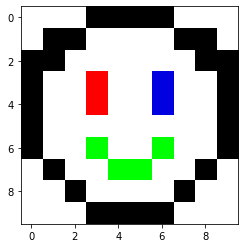

In [61]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(image_data, interpolation='nearest')
plt.show()

In [ ]:
# 아나콘다 프롬프트에서 tensorflow 패키지 인스톨

In [62]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [64]:
import tensorflow.keras.datasets.mnist as mnist
mnist = mnist.load_data()
mnist[0][0].shape # 독립변수(학습셋 = 훈련셋)

(60000, 28, 28)

In [66]:
mnist[0][0]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [68]:
mnist[0][1].shape # 종속변수(학습셋 = 훈련셋)

(60000,)

In [69]:
mnist[0][1]

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [70]:
mnist[1][0].shape # 독립변수 (테스트셋)

(10000, 28, 28)

In [71]:
mnist[1][1].shape # 종속변수(테스트셋)

(10000,)

In [72]:
x = mnist[0][0]
y = mnist[0][1]

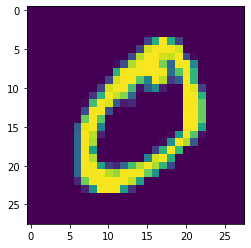

In [75]:
import matplotlib.pyplot as plt
plt.imshow(x[1])
plt.show()

In [76]:
y[1]

0

In [78]:
list(x[1].flat)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 51,
 159,
 253,
 159,
 50,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 48,
 238,
 252,
 252,
 252,
 237,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 54,
 227,
 253,
 252,
 239,
 233,
 252,
 57,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 60,
 224,
 252,
 253,
 252,
 202,
 84,
 252,
 253,
 122,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 163,
 2

## 5.2 다차원 인덱싱

In [80]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [81]:
i = np.array([[0,1],
               [1,2]]) #행
j = np.array([[2,1],
              [3,3]]) #열
a[i, j]

array([[ 2,  5],
       [ 7, 11]])

In [82]:
i = np.array([0,1])
j = np.array([2,3])
a[i, j]

array([2, 7])

## 5.3 argmax : 최대값이 있는 곳의 인덱스

In [83]:
data = np.sin(np.arange(20).reshape(5,4))
data

array([[ 0.        ,  0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ,  0.6569866 ],
       [ 0.98935825,  0.41211849, -0.54402111, -0.99999021],
       [-0.53657292,  0.42016704,  0.99060736,  0.65028784],
       [-0.28790332, -0.96139749, -0.75098725,  0.14987721]])

In [85]:
ind = data.argmax(axis = 0)  # 각 열별 큰 값이 있는 index
ind

array([2, 0, 3, 1], dtype=int64)

In [87]:
# 0열에서 최대값, 1열에서 최대값
data[ind[0],0], data[ind[1],1]

(0.9893582466233818, 0.8414709848078965)

In [88]:
data.shape

(5, 4)

In [89]:
data_col_max = data[ind, range(data.shape[1])]
data_col_max

array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [90]:
for i, item in enumerate(data_col_max):
    print("{}열의 최대값은 {}".format(i, item))

0열의 최대값은 0.9893582466233818
1열의 최대값은 0.8414709848078965
2열의 최대값은 0.9906073556948704
3열의 최대값은 0.6569865987187891


In [92]:
np.all(data.max(axis=0) == data_col_max)

True

In [ ]:
# 행별 최대값을 출력하기(argmax함수를 이용한 최대값 출력, np.all을 이용하여 max()결과와 비교)

In [93]:
ind = data.argmax(axis =1)
ind

array([2, 3, 0, 2, 3], dtype=int64)

In [94]:
data_row_max = data[range(data.shape[0]),ind]
data_col_max

array([0.98935825, 0.84147098, 0.99060736, 0.6569866 ])

In [95]:
for i, item in enumerate(data_row_max):
    print("{}행의 최대값은 {}".format(i, item))

0행의 최대값은 0.9092974268256817
1행의 최대값은 0.6569865987187891
2행의 최대값은 0.9893582466233818
3행의 최대값은 0.9906073556948704
4행의 최대값은 0.14987720966295234


In [96]:
np.all(data.max(axis=1) == data_row_max)

True

## 5.4 인덱싱을 이용한 값변경

In [100]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [101]:
a[::2]= 99
a

array([99,  1, 99,  3, 99])

## 5.5 논리 배열을 이용한 인덱싱

In [103]:
a = np.arange(20).reshape(2,10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [104]:
b = a%2 ==0
b

array([[ True, False,  True, False,  True, False,  True, False,  True,
        False],
       [ True, False,  True, False,  True, False,  True, False,  True,
        False]])

In [105]:
a[b]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [107]:
a[a%3==0]

array([ 0,  3,  6,  9, 12, 15, 18])

# 6절 선형대수
- 2차원 넘파일 배열을 행렬
   - 행렬곱 : @ 또는 np.dot()
   - 역행렬 : np.linalg.inv(x)
   - 전치행렬 : x.T, x.transpose()
   - 단위행렬 : np.eye(n) : n행 n열 단위행렬
   - 연립방정식 해 풀기 : np.linalg.inv(x,y) 단 x가 정방행렬인 경우

## 6.1 선형 연립 방정식 풀기(회귀도출): 독립변수 2개, 데이터 2개

In [111]:
#a의 역행렬@ a는 단위행렬
a = np.array([[1,2],[3,4]])
np.linalg.inv(a) @ a

array([[1.0000000e+00, 4.4408921e-16],
       [0.0000000e+00, 1.0000000e+00]])

In [113]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [115]:
np.all(np.eye(2) @ a == a)

True

In [116]:
a.T

array([[1, 3],
       [2, 4]])

In [117]:
a = np.array([[2,2,2],[3,3,3]])
a

array([[2, 2, 2],
       [3, 3, 3]])

In [118]:
np.linalg.inv(a) #정방행렬이 아니면 오류뜸

LinAlgError: Last 2 dimensions of the array must be square

In [120]:
a=np.array([[2,2,2],[3,3,3]])
a

array([[2, 2, 2],
       [3, 3, 3]])

In [122]:
a.T @ a #정방행렬을 만들고자 할때 전치행렬 사용

array([[13, 13, 13],
       [13, 13, 13],
       [13, 13, 13]])

**독립변수 2개, 데이터 2개**

In [124]:
x = np.array([[1,2],
              [3,4]]) #독립변수

In [125]:
y = np.array([[5],
              [7]]) #종속변수


x @ w =y <br>
x 의 역행렬 @ x @ w = x의 역행렬 @ y <br>
w = x의 역행렬 @ y <br>

In [128]:
W = np.linalg.inv(x) @ y
W

array([[-3.],
       [ 4.]])

In [129]:
# 독립변수가 2,3 일 경우 종속변수는?
2*W[0] +3*W[1]

array([6.])

## 6.2 선형 연립방정식(회귀도출)과 그래프 : 독립변수1

**정방행렬을 위해 데이터 2**

In [130]:
x=np.array([2,3])
y=[6.8, 7.3]

In [132]:
np.ones(len(x))

array([1., 1.])

In [143]:
# 2 1
# 3 1
X = np.column_stack((x, np.ones(len(x)))) #독립변수
X

array([[2., 1.],
       [3., 1.]])

In [134]:
Y = np.array(y).reshape(2,1)
Y

array([[6.8],
       [7.3]])

**X@W = Y** <br>
**X의 역행렬 @ X @ W = X의 역행렬 @ Y ** <br>
**W = X의 역행렬 @ Y** <br>

In [140]:
W = np.linalg.inv(X) @ Y
W

array([[0.5],
       [5.8]])

In [141]:
f = X[:,0] * W[0] +W[1]
f

array([6.8, 7.3])

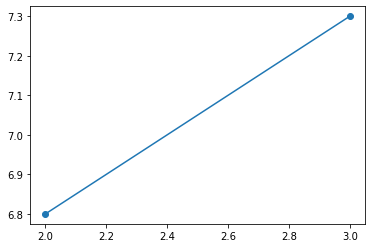

In [145]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(x, f, '')
plt.show()

**데이터를 n개**

In [146]:
x = [32,64,96,118,126,144,152.5,158] #독립변수
y = [18, 24, 61.5, 49, 52,105, 130.3, 125] #독립변수

In [148]:
X=np.column_stack((x, np.ones(len(x))))
print(X) #독립변수 행렬
Y=np.array(y).reshape(len(y),1)
print(Y) #종속변수 행렬

[[ 32.    1. ]
 [ 64.    1. ]
 [ 96.    1. ]
 [118.    1. ]
 [126.    1. ]
 [144.    1. ]
 [152.5   1. ]
 [158.    1. ]]
[[ 18. ]
 [ 24. ]
 [ 61.5]
 [ 49. ]
 [ 52. ]
 [105. ]
 [130.3]
 [125. ]]


X @ W = Y <br>
X.T@ X @ W = X.T @ Y <br>
(X.T @ X)의 역행렬 @ X.T @ X @ W = (X.T @ X)의 역행렬 @ X.T @ Y <br>
W = (X.T @ X)의 역행렬 @ X.T @ Y <br>

In [150]:
W = np.linalg.inv(X.T @ X) @ X.T @ Y
W

array([[  0.87493126],
       [-26.79078617]])

In [154]:
f = X[:, 0] * W[0] + W[1] # 예측치
f

array([  1.20701424,  29.20481464,  57.20261504,  76.45110282,
        83.45055292,  99.19931565, 106.63623138, 111.44835332])

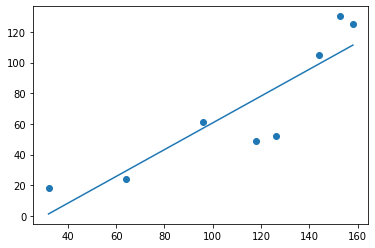

In [156]:
plt.scatter(x,y)
plt.plot(X[:,0],f,'-')
plt.show()

# 7절. 연습문제

## 7.1 실습형

In [159]:
#1
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris
print(iris.data) # 독립변수
print(iris.target) # 종속변수

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
iris_data = iris.data # 독립변수
iris_target = iris.target # 종속변수

In [162]:
iris.target_names[iris.target]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [163]:
iris.data.mean(axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [181]:
#2
Data = iris.data[0:5,].copy()
Data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [186]:
#3
Data[:,:-1]

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])

In [187]:
#4
Data[:,-1]

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [190]:
#5
import numpy as np
hstack((Data[:,:-1],Data[:,-1]))

NameError: name 'hstack' is not defined